# Decision and Regression Trees

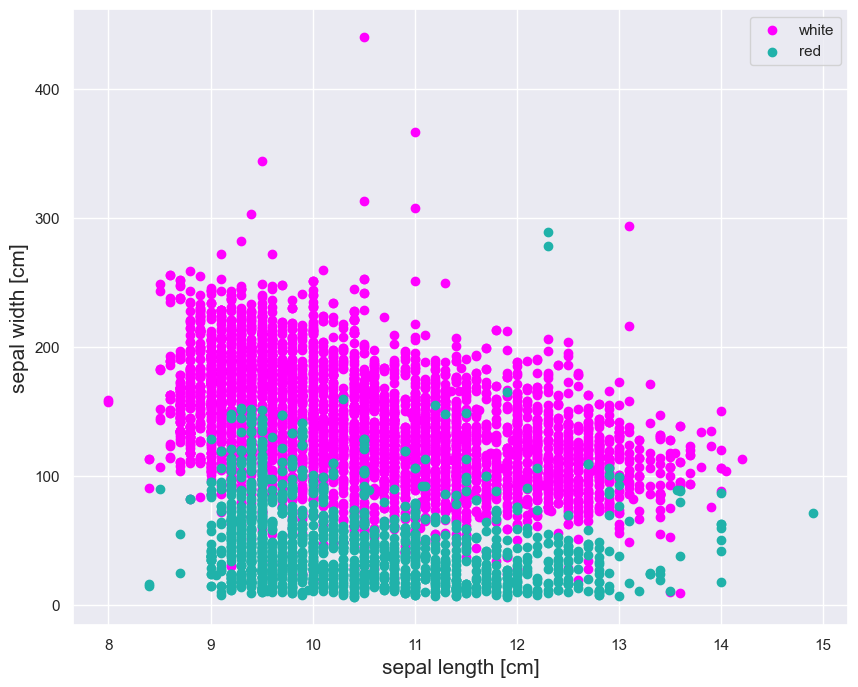

In [413]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

# Set theme for plotting
sns.set_theme()

# Set theme for plotting
sns.set_theme()

# Import the data
iris = pd.read_csv("Datasets/winequalityN.csv")
iris = iris.dropna()
X = iris[["alcohol","total sulfur dioxide"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "white":
        return 0
    else:
        return 1
         
# Create target value array
y = iris["type"].map(make_labels).to_numpy()

# Plot the data
flowers = ["white","red"]
colors = ["magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(flowers, colors):
    temp_df = iris[iris.type == species]
    ax.scatter(temp_df["alcohol"],
               temp_df["total sulfur dioxide"],
               c = color,
               label = species, 
               )
    
ax.set_xlabel("sepal length [cm]", fontsize = 15)
ax.set_ylabel("sepal width [cm]", fontsize = 15)
ax.legend()
plt.show()

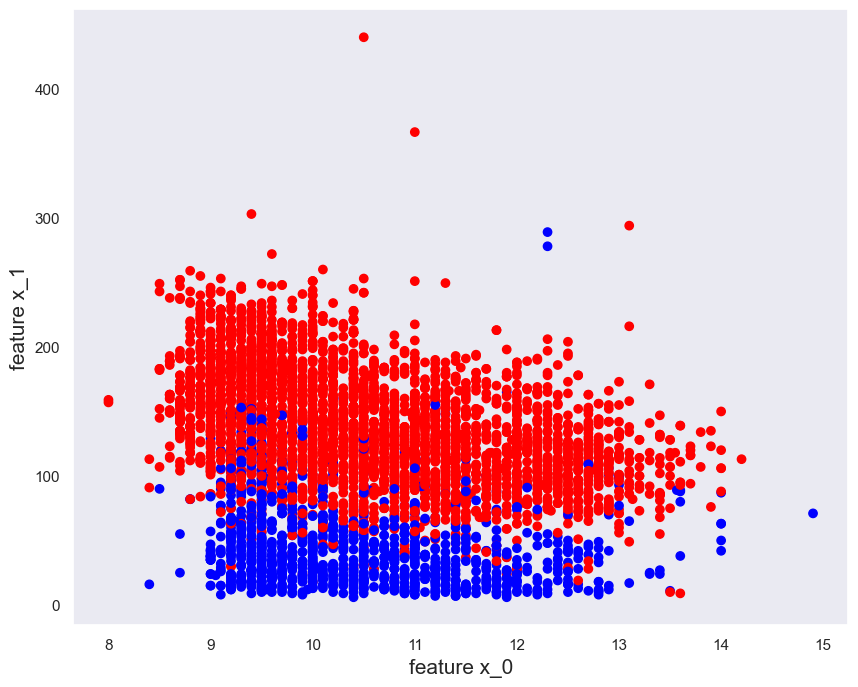

In [414]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=1)

c_train = ["red" if label == 0 else "blue" for label in y_train]
c_test = ["red" if label == 0 else "blue" for label in y_test]

plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c = c_train)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

In [415]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=15, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

|--- x_1 <= 67.50
|   |--- x_1 <= 54.50
|   |   |--- x_1 <= 27.50
|   |   |   |--- x_0 <= 13.45
|   |   |   |   |--- x_1 <= 17.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- x_1 >  17.50
|   |   |   |   |   |--- x_0 <= 12.55
|   |   |   |   |   |   |--- x_0 <= 9.85
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- x_0 >  9.85
|   |   |   |   |   |   |   |--- x_0 <= 10.05
|   |   |   |   |   |   |   |   |--- x_1 <= 23.50
|   |   |   |   |   |   |   |   |   |--- x_1 <= 18.50
|   |   |   |   |   |   |   |   |   |   |--- x_0 <= 9.95
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- x_0 >  9.95
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- x_1 >  18.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- x_1 >  23.50
|   |   |   |   |   |   |   |   |   |--- x_1 <= 24.50
|   |   |   |   |   |   |   |   |   |   |--- cla

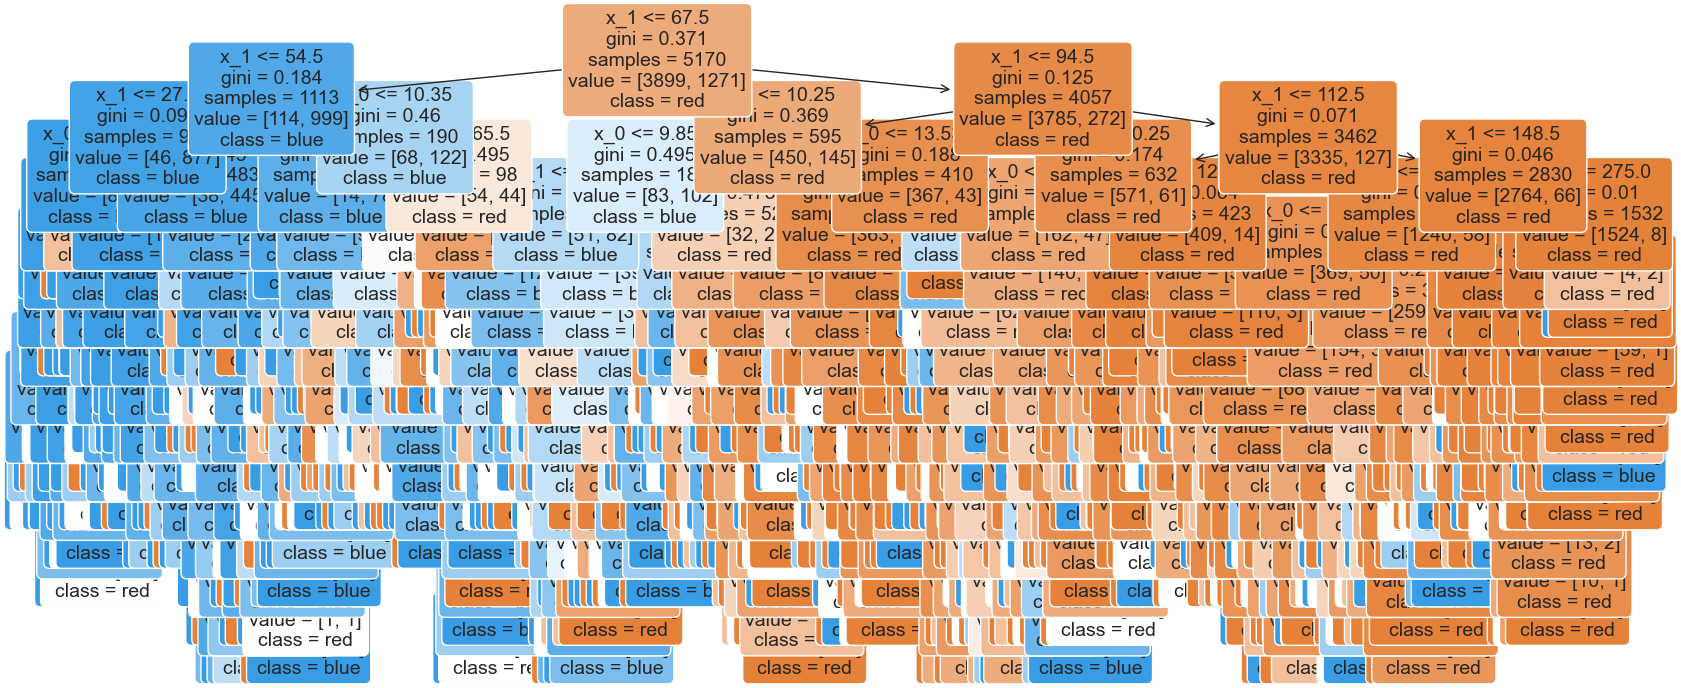

In [416]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                         feature_names = ["x_0", "x_1"])
print(tree_rules, "\n")


plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   feature_names = ["x_0", "x_1"],
                   class_names = ["red", "blue"],
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

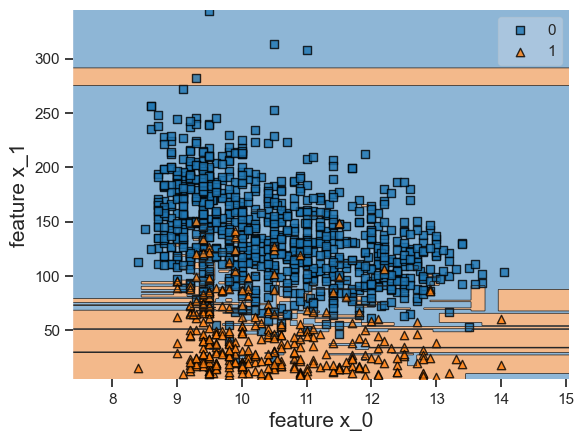

In [417]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, y_test, clf = decision_tree)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

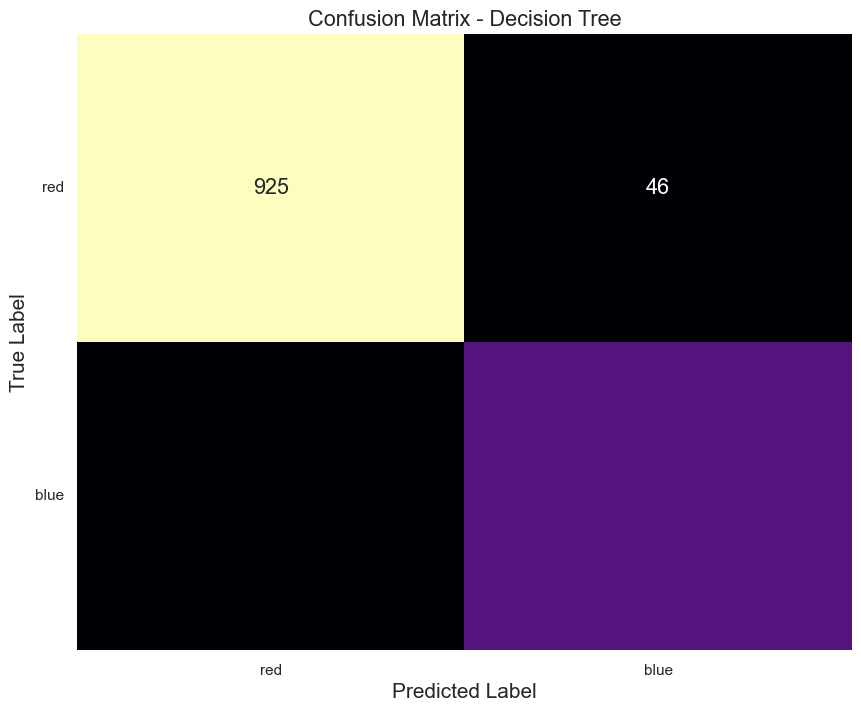

In [418]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["red", "blue"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["red", "blue"], rotation=0)
plt.show()

In [419]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       971
           1       0.86      0.85      0.85       322

    accuracy                           0.93      1293
   macro avg       0.90      0.90      0.90      1293
weighted avg       0.93      0.93      0.93      1293



# Regression Trees

In [428]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import the data
iris = pd.read_csv("Datasets/CrabAgePrediction.csv")
iris = iris[iris.Sex == "I"]
# Target is median age of crab
X = iris[["Length",
          "Diameter",
          "Height",
          "Weight",
          "Shucked Weight",
          "Viscera Weight",
          "Shell Weight"]].to_numpy()
y = iris[["Age"]].to_numpy()
y = y.tolist()

In [429]:
X[0].shape

(7,)

In [430]:
y[0]

[6]

In [431]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)

reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [432]:
from sklearn.metrics import mean_squared_error

reg1 = DecisionTreeRegressor(max_depth=1, random_state = 12)
reg1.fit(X_train, y_train)
y_pred = reg1.predict(X_test)
print(f"MSE reg1: {mean_squared_error(y_test, y_pred)} \n")


reg2 = DecisionTreeRegressor(max_depth=20, random_state = 12)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
print(f"MSE reg2: {mean_squared_error(y_test, y_pred)} \n")


MSE reg1: 4.038298391981876 

MSE reg2: 4.46925566343042 



In [433]:
reg1 = DecisionTreeRegressor(max_depth=1)
reg1.fit(X_train, y_train)
y_pred = reg1.predict(X_test)
print(f"MSE reg1: {mean_squared_error(y_test, y_pred)} \n")


reg2 = DecisionTreeRegressor(max_depth=20)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
print(f"MSE reg2: {mean_squared_error(y_test, y_pred)} \n")

MSE reg1: 4.038298391981876 

MSE reg2: 4.411003236245954 

